Data Visualization Lab 3

In [130]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Question 1 (Bubble map to show the populations of all the state capital of India)

In [132]:
# import required libraries
from urllib import request
import pandas as pd
import numpy as numpy
import folium
from shapely.geometry import Point
import geopandas as gpd
import webbrowser
import matplotlib.pyplot as plt
import requests

In [133]:
# Import dataset
df=pd.read_csv("/content/Data_DV_lab3 - Sheet1 (1).csv")
print(df.describe())
print(df.head())
df2=df.copy()

        latitude  longitude    population
count  36.000000  36.000000  3.600000e+01
mean   23.084768  81.713802  3.422001e+06
std     6.761944   7.201416  6.561418e+06
min     8.524139  72.635813  1.147300e+04
25%    19.991067  76.765234  2.710000e+05
50%    23.774427  78.261938  1.092000e+06
75%    27.151176  88.333898  2.360500e+06
max    34.209515  94.110990  3.294100e+07
            state  capital   latitude  longitude  population
0   Uttar Pradesh  Lucknow  26.850000  80.949997     3884000
1      Maharashta   Mumbai  19.076090  72.877426    17159000
2           Bihar    Patna  25.612677  85.158875     2321000
3     West Bengal  Kolkata  22.572645  88.363892    14900000
4  Madhya Pradesh   Bhopal  23.259933  77.412613     2479000


In [134]:
contry_bubble_map= gpd.read_file("/content/data.zip")
print(contry_bubble_map.head(5))
print(contry_bubble_map.describe())

   ID_0  ISO NAME_0  ID_1               NAME_1 HASC_1  CCN_1  CCA_1  \
0   105  IND  India     1  Andaman and Nicobar  IN.AN      0    NaN   
1   105  IND  India     2       Andhra Pradesh  IN.AP      0    NaN   
2   105  IND  India     3    Arunachal Pradesh  IN.AR      0    NaN   
3   105  IND  India     4                Assam  IN.AS      0    NaN   
4   105  IND  India     5                Bihar  IN.BR      0    NaN   

           TYPE_1        ENGTYPE_1  NL_NAME_1  \
0  Union Territor  Union Territory        NaN   
1           State            State        NaN   
2           State            State        NaN   
3           State            State        NaN   
4           State            State        NaN   

                                           VARNAME_1  \
0  Andaman & Nicobar Islands|Andaman et Nicobar|I...   
1                                                NaN   
2  Agence de la Frontière du Nord-Est(French-obso...   
3                                                NaN  

In [135]:
df2=contry_bubble_map.merge(df, how='inner',left_on='NAME_1',right_on='state')
print(df2.head(5))
df2.describe()

   ID_0  ISO NAME_0  ID_1             NAME_1 HASC_1  CCN_1  CCA_1  \
0   105  IND  India     2     Andhra Pradesh  IN.AP      0    NaN   
1   105  IND  India     3  Arunachal Pradesh  IN.AR      0    NaN   
2   105  IND  India     4              Assam  IN.AS      0    NaN   
3   105  IND  India     5              Bihar  IN.BR      0    NaN   
4   105  IND  India     6         Chandigarh  IN.CH      0    NaN   

           TYPE_1        ENGTYPE_1  NL_NAME_1  \
0           State            State        NaN   
1           State            State        NaN   
2           State            State        NaN   
3           State            State        NaN   
4  Union Territor  Union Territory        NaN   

                                           VARNAME_1  \
0                                                NaN   
1  Agence de la Frontière du Nord-Est(French-obso...   
2                                                NaN   
3                                                NaN   
4         

ID_0       ID_1  CCN_1  CCA_1  NL_NAME_1   latitude  longitude  \
count   31.0  31.000000   31.0    0.0        0.0  31.000000  31.000000   
mean   105.0  20.032258    0.0    NaN        NaN  22.549249  82.305758   
std      0.0  10.625391    0.0    NaN        NaN   6.630339   7.002085   
min    105.0   2.000000    0.0    NaN        NaN   8.524139  72.635813   
25%    105.0  11.500000    0.0    NaN        NaN  18.841600  76.852352   
50%    105.0  21.000000    0.0    NaN        NaN  23.717396  80.237617   
75%    105.0  29.500000    0.0    NaN        NaN  26.886035  88.343896   
max    105.0  36.000000    0.0    NaN        NaN  34.083658  94.110990   

         population  
count  3.100000e+01  
mean   2.544371e+06  
std    3.601331e+06  
min    1.147300e+04  
25%    5.242885e+05  
50%    1.191000e+06  
75%    2.400000e+06  
max    1.490000e+07

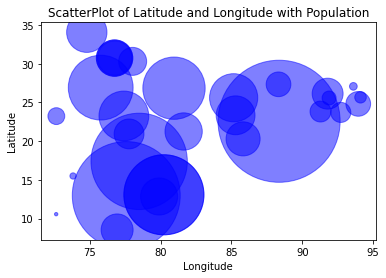

In [136]:
# Scatter Plot
population=df2.population
plt.scatter(df2['longitude'],df2['latitude'],s=population/1000,c='blue',alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('ScatterPlot of Latitude and Longitude with Population')
plt.show()


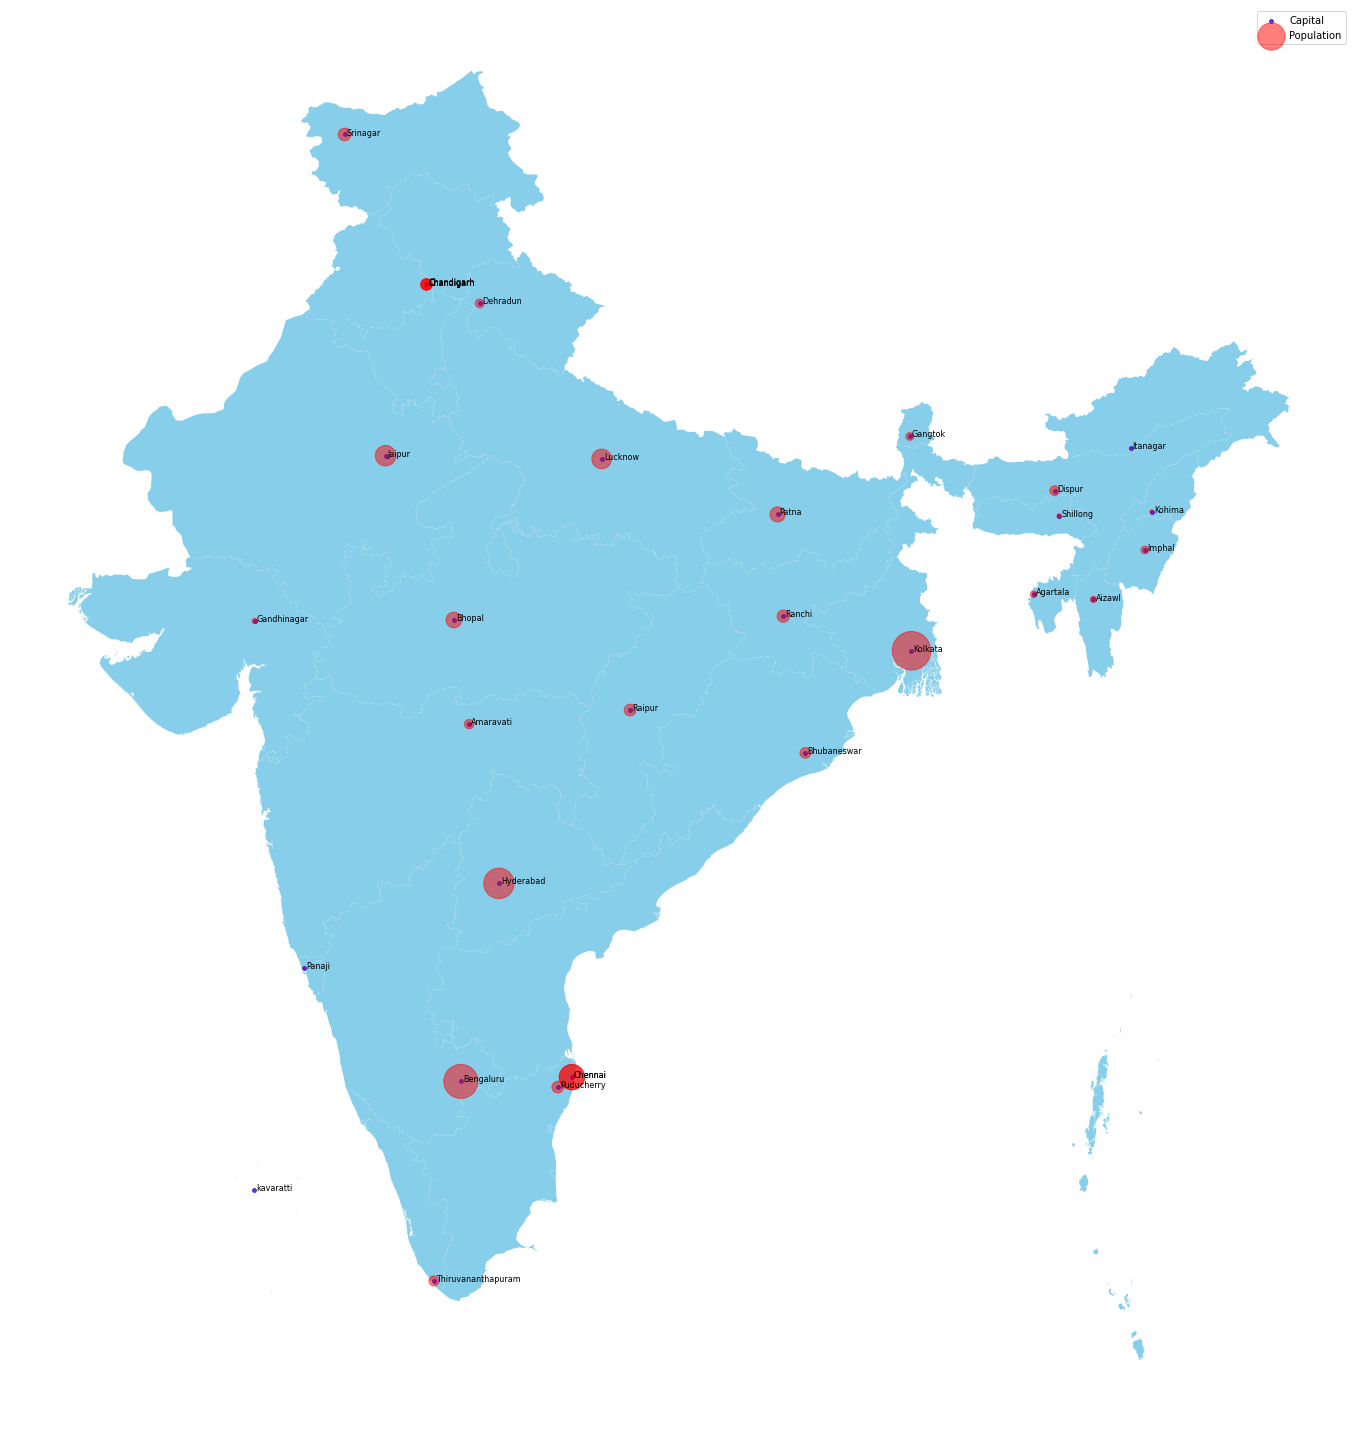

In [137]:
# using geopandas
a=df2.longitude
b=df2.latitude
file=zip(a,b)
configuration=[Point(points) for points in file]
fig,ax=plt.subplots(figsize=(20,20))
contry_bubble_map.plot(ax=ax,color='skyblue',linewidth=1.0)
gpd.GeoDataFrame(df2,geometry=configuration).plot(ax=ax,markersize=15,color='blue',alpha=0.7,marker='o',label='Capital')
gpd.GeoDataFrame(df2,geometry=configuration).plot(ax=ax,markersize=gpd.GeoDataFrame(df2,geometry=configuration)['population']/10000,color='red',alpha=0.5,marker='o',label='Population')
for i,i in gpd.GeoDataFrame(df2, geometry=configuration).iterrows():
    plt.text(i['longitude']+0.05, i['latitude']+0.05, str(i['capital']), fontsize=8, color='black', ha='left', va='center')
plt.axis('off')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()



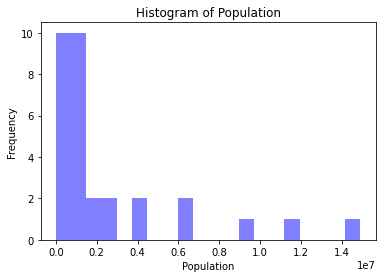

In [138]:
plt.hist(population, bins=20, color='blue', alpha=0.5)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram of Population')
plt.show()


Question 2 ( Connection graph of Go Air domestic flights of India)

In [139]:
# Load Given dataset
data2=pd.read_csv("/content/flight_data.csv")
print(data2.head())
data2.describe()

      Origin Destination Flight Number Departure Time Arrival Time  \
0  Abu Dhabi   Ahmedabad          G8 6          23:30        14:10   
1  Abu Dhabi   Ahmedabad          G8 6          23:30        14:35   
2  Abu Dhabi   Ahmedabad          G8 6          23:30        18:25   
3  Abu Dhabi   Ahmedabad          G8 6          23:30        08:55   
4  Abu Dhabi   Ahmedabad         G8 76          21:40        07:35   

  Flight Time  Routing      Operations       No Effective From EffectiveTo  
0       13:10  Via BOM              Sa   G8 247     02/03/2023  02/05/2023  
1       13:35  Via BOM  M,W,Th,F,Sa,Su  G8 2504     02/03/2023  02/05/2023  
2       17:25  Via BOM           Daily   G8 364     02/03/2023  02/05/2023  
3       07:55  Via BOM           Daily   G8 365     02/03/2023  02/05/2023  
4       08:25  Via DEL  M,Tu,W,Th,F,Su   G8 719     02/03/2023  02/11/2023  


Origin Destination Flight Number Departure Time Arrival Time  \
count     3244        3244          3244           3244         3244   
unique      36          36           266            175          185   
top     Mumbai      Mumbai       G8 2620          09:25        08:25   
freq       348         328            55             67          103   

       Flight Time  Routing Operations    No Effective From EffectiveTo  
count         3244     3244       3244  3244           3244        3244  
unique         240       25         72   201              3          24  
top          12:45  Via BOM      Daily     -     02/03/2023  02/15/2023  
freq            38     1301       1176   367           2857        1308

In [140]:
# Unique Values
origin1=pd.unique(data2['Origin'])
dest1 = pd.unique(data2['Destination'])
cities=numpy.unique(numpy.concatenate((origin1,dest1),0))
cities

array(['Abu Dhabi', 'Ahmedabad', 'Amritsar', 'Bagdogra', 'Bangkok',
       'Bengaluru', 'Chandigarh', 'Chennai', 'Dammam', 'Dehra Dun',
       'Delhi', 'Dubai', 'Goa', 'Goa-New Goa', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jammu', 'Kannur', 'Kochi', 'Kolkata', 'Kuwait', 'Leh',
       'Lucknow', 'Male', 'Mumbai', 'Muscat', 'Nagpur', 'Patna', 'Phuket',
       'Port Blair', 'Pune', 'Ranchi', 'Srinagar', 'Thoise', 'Varanasi'],
      dtype=object)

In [141]:
latitudes=[]
longitudes=[]
API_KEY='c3e69fdf5a8d0bd03f0a25a05e48553b'
link='https://nominatim.openstreetmap.org/search?q={i}&format=json'

for i in cities:
   d_j=requests.get( link).json()
   lon=(d_j[0]['lon'])
   lat=(d_j[0]['lat'])
   latitudes.append(lat)
   longitudes.append(lon)



In [142]:
coord_lat={k:val for k,val in zip(cities, latitudes)}
coord_lon={k:val for k,val in zip(cities, longitudes)}

In [143]:
data2['origin_lat']=data2['Origin'].map(coord_lat)
data2['origin_lon']=data2['Origin'].map(coord_lon)
data2['destination_lat']=data2['Destination'].map(coord_lat)
data2['destination_lon']=data2['Destination'].map(coord_lon)


In [144]:
dict_value=data2['Origin'].value_counts(dropna=False).to_dict()
data2['origin_count']=data2['Origin'].map(dict_value)

In [145]:
filename="data.csv"
data2.to_csv(filename, index=False)

In [146]:
data3=pd.read_csv("data.csv")
data3.head()

Origin Destination Flight Number Departure Time Arrival Time  \
0  Abu Dhabi   Ahmedabad          G8 6          23:30        14:10   
1  Abu Dhabi   Ahmedabad          G8 6          23:30        14:35   
2  Abu Dhabi   Ahmedabad          G8 6          23:30        18:25   
3  Abu Dhabi   Ahmedabad          G8 6          23:30        08:55   
4  Abu Dhabi   Ahmedabad         G8 76          21:40        07:35   

  Flight Time  Routing      Operations       No Effective From EffectiveTo  \
0       13:10  Via BOM              Sa   G8 247     02/03/2023  02/05/2023   
1       13:35  Via BOM  M,W,Th,F,Sa,Su  G8 2504     02/03/2023  02/05/2023   
2       17:25  Via BOM           Daily   G8 364     02/03/2023  02/05/2023   
3       07:55  Via BOM           Daily   G8 365     02/03/2023  02/05/2023   
4       08:25  Via DEL  M,Tu,W,Th,F,Su   G8 719     02/03/2023  02/11/2023   

   origin_lat  origin_lon  destination_lat  destination_lon  origin_count  
0    47.26543   11.392769         47.26543        11.392769            80  
1    47.26543   11.392769         47.26543        11.392769            80  
2    47.26543   11.392769         47.26543        11.392769            80  
3    47.26543   11.392769         47.26543        11.392769            80  
4    47.26543   11.392769         47.26543        11.392769            80

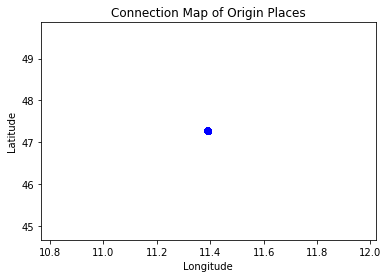

In [147]:
# Connection Map using Scatter Plot
x=data3['origin_lon']
y=data3['origin_lat']
size=data3['origin_count']/10
plt.scatter(x, y, s=size, c='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Connection Map of Origin Places')
plt.show()


In [148]:
import plotly.express as px
x=data3.origin_lon
y=data3.origin_lat
fig = px.scatter(data3, x,y, size='origin_count')
fig.show()


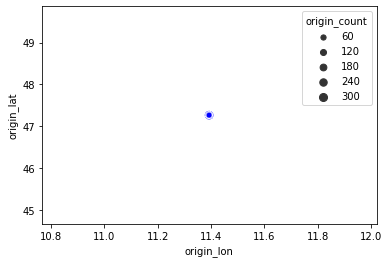

In [152]:
import seaborn as sns
sns.scatterplot(x=data3['origin_lon'], y=data3['origin_lat'], size=data3['origin_count'], color='blue', data=df2)


In [153]:
# Connection Map using Folium
connection_map=folium.Map(location=[21.53, 78.69], zoom_start=5.5)
for i, j in data3.iterrows():
    circle_marker=folium.CircleMarker(location=[j['origin_lat'], j['origin_lon']],
                        radius=(j['origin_count']/10),color='blue',
                        fill=True,fill_color=None,)
    connection=circle_marker.add_child(folium.Tooltip(f"Place: {j['Origin']}, Longitude: {j['origin_lon']}, Latitude: {j['origin_lat']} \n Origin Count: {'origin_count'}"))
    connection.add_to(connection_map)
    map_folium=folium.PolyLine([[j['origin_lat'], j['origin_lon']], [j['destination_lat'], j['destination_lon']]], 
                  color='blue',opacity=0.2
                )
    final_map=map_folium.add_child(folium.Tooltip(f"Route: {j['Origin']} to {j['Destination']} \n Routing: {j['Routing']} \n Flight No: {j['Flight Number']}"))
    final_map.add_to(connection_map)
# Show connection map
connection_map

In [154]:
pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# using ggplot
from pandas import Timestamp
import rpy2
import ggplot as gg
connection_data = data3[["origin_lat", "origin_lon", "origin_count"]]
gg_plot = gg.ggplot(connection_data, gg.aes(x="origin_lon", y="origin_lat", size="origin_count", color="blue"))
gg_plot += gg.geom_point()
gg_plot += gg.xlab("Longitude")
gg_plot += gg.ylab("Latitude")
gg_plot += gg.ggtitle("Connection Map")
gg_plot.show()
